In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from os import path
import os

# Importing necessary classes for data preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Importing functions for evaluating model performance
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Importing functions for data splitting and training models
from sklearn.model_selection import train_test_split

# Importing various machine learning algorithms
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

In [2]:
df = pd.read_csv("C:\\Users\\user\\Documents\\jupyter\\Enhanced IDS\\Dataset\\df_cleaned.csv")

C:\Users\user\AppData\Local\Temp\ipykernel_8448\3729206484.py:1: DtypeWarning: Columns (72) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:\\Users\\user\\Documents\\jupyter\\Enhanced IDS\\Dataset\\df_cleaned.csv")


In [3]:
df.shape

(426331, 75)

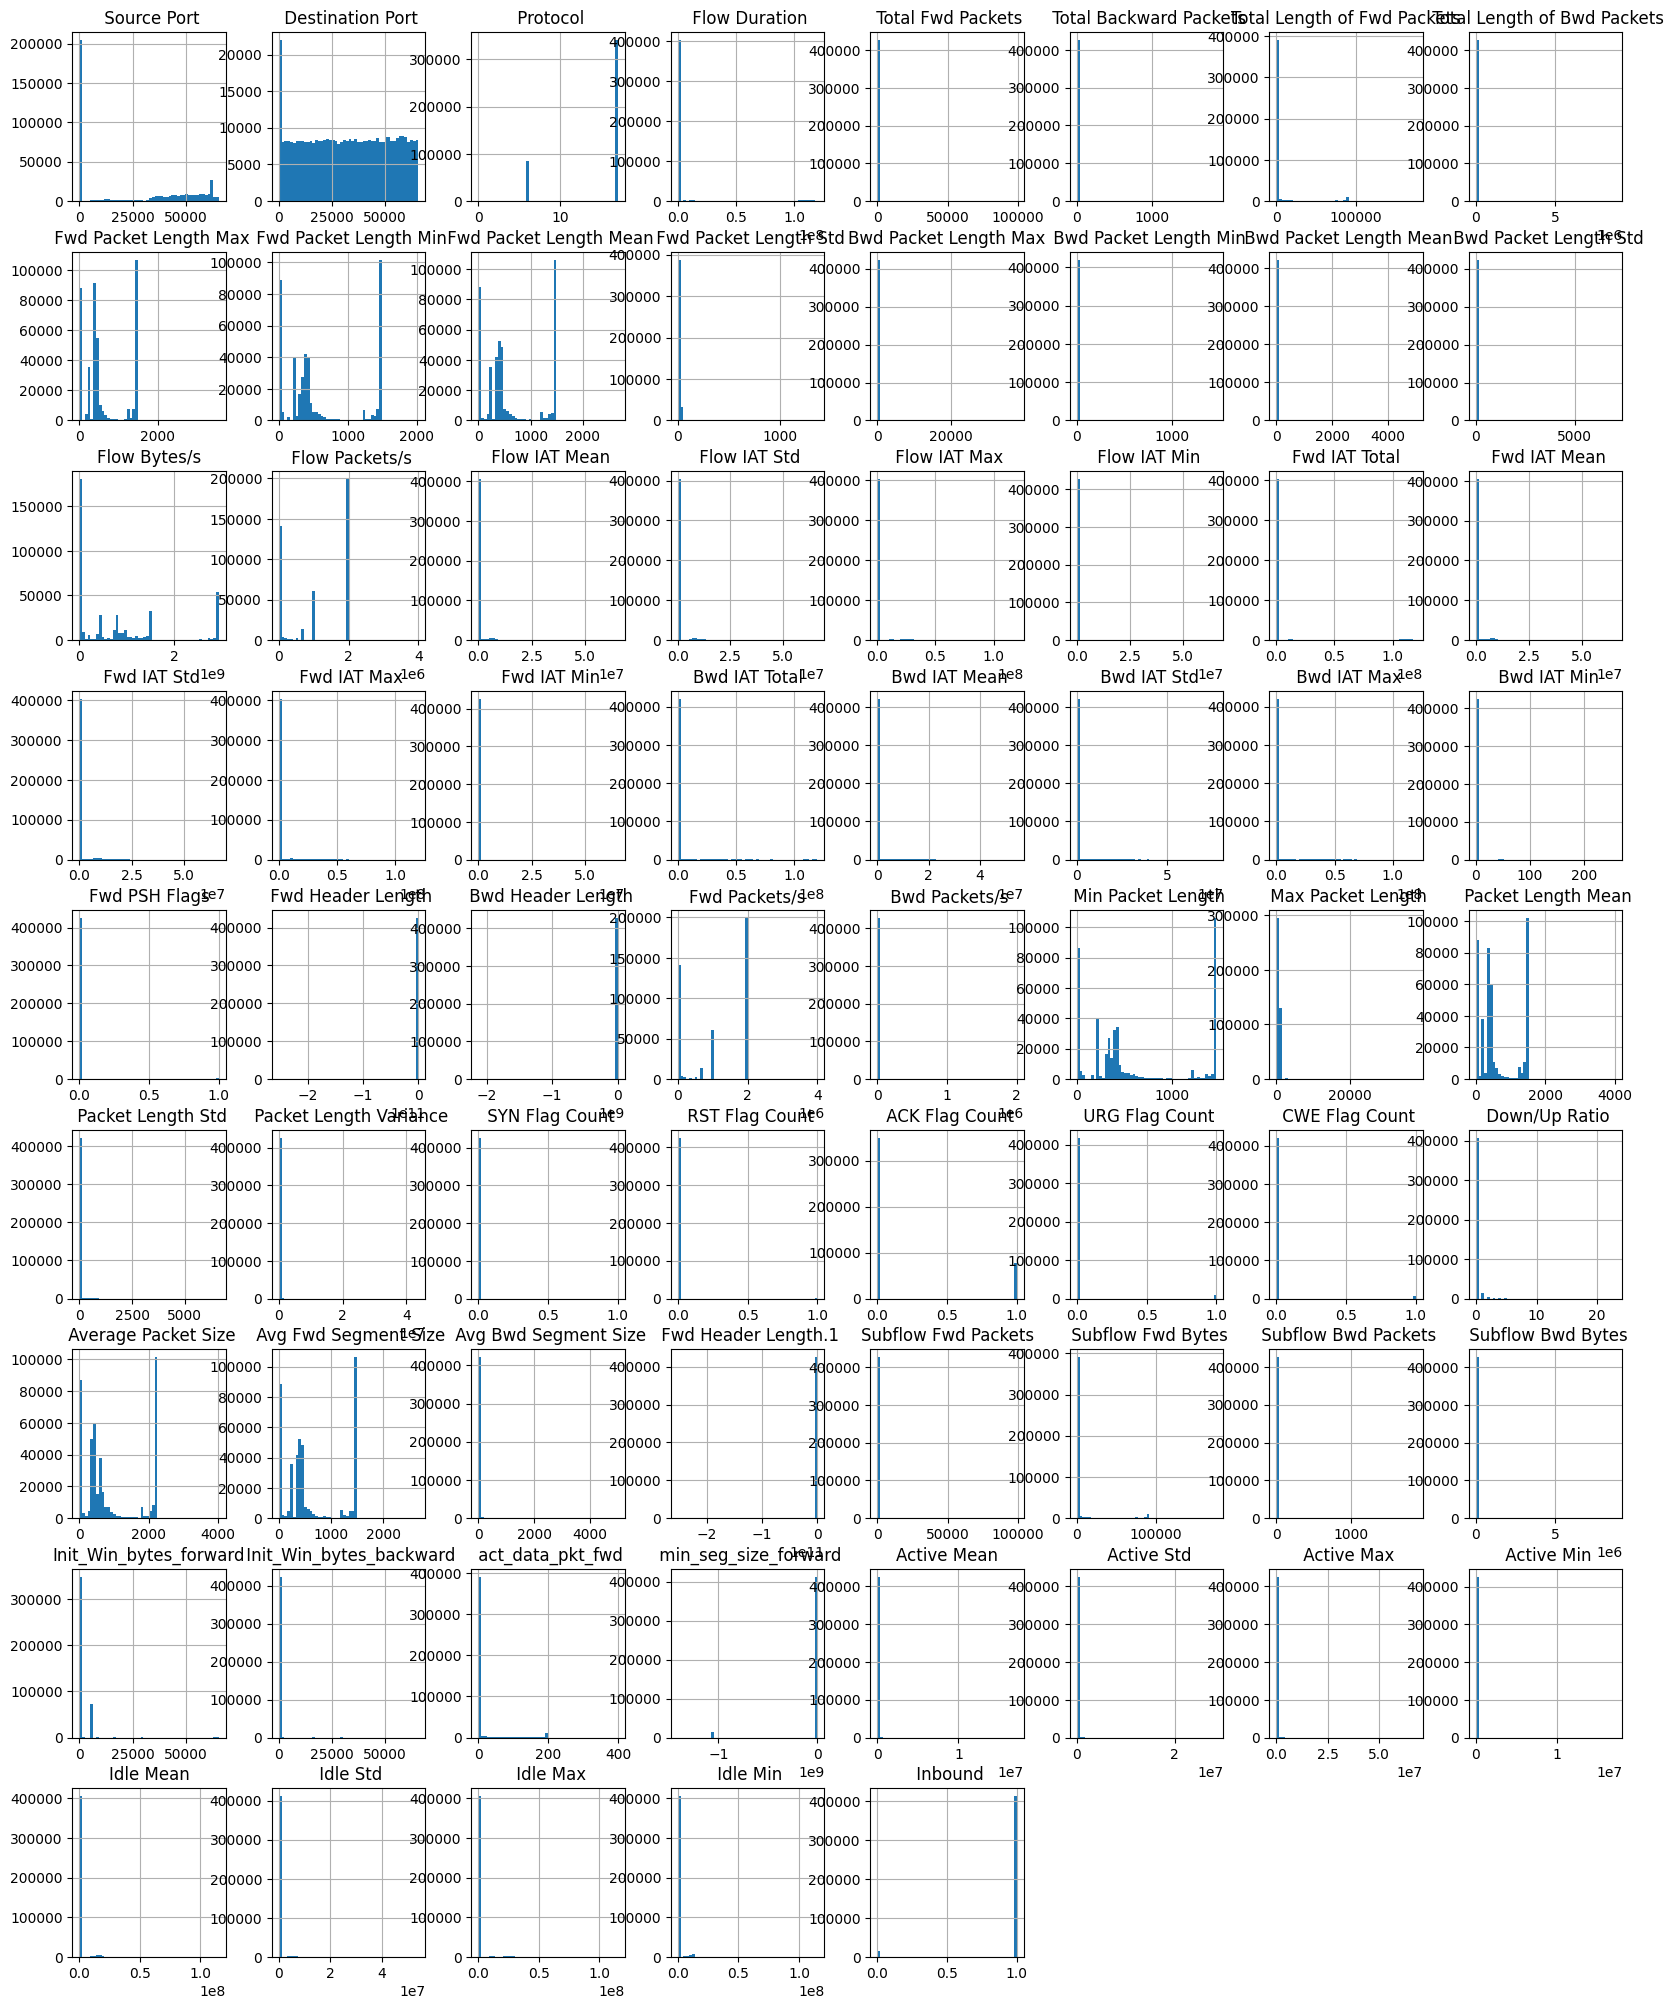

In [4]:
df.hist(bins = 50, figsize=(20, 25))
plt.show()

In [5]:
df[' Label'].unique()

array(['DrDoS_DNS', 'BENIGN', 'DrDoS_LDAP', 'DrDoS_MSSQL',
       'DrDoS_NetBIOS', 'DrDoS_NTP', 'DrDoS_SNMP', 'DrDoS_SSDP', 'Syn',
       'TFTP', 'DrDoS_UDP', 'UDP-lag', 'WebDDoS'], dtype=object)

In [6]:
df[' Label'].value_counts()

 Label
DrDoS_SSDP       39850
UDP-lag          39744
DrDoS_SNMP       39417
DrDoS_UDP        39221
DrDoS_LDAP       39064
DrDoS_MSSQL      38952
DrDoS_NetBIOS    37786
DrDoS_DNS        37420
Syn              36529
TFTP             35954
DrDoS_NTP        27447
BENIGN           14941
WebDDoS              6
Name: count, dtype: int64

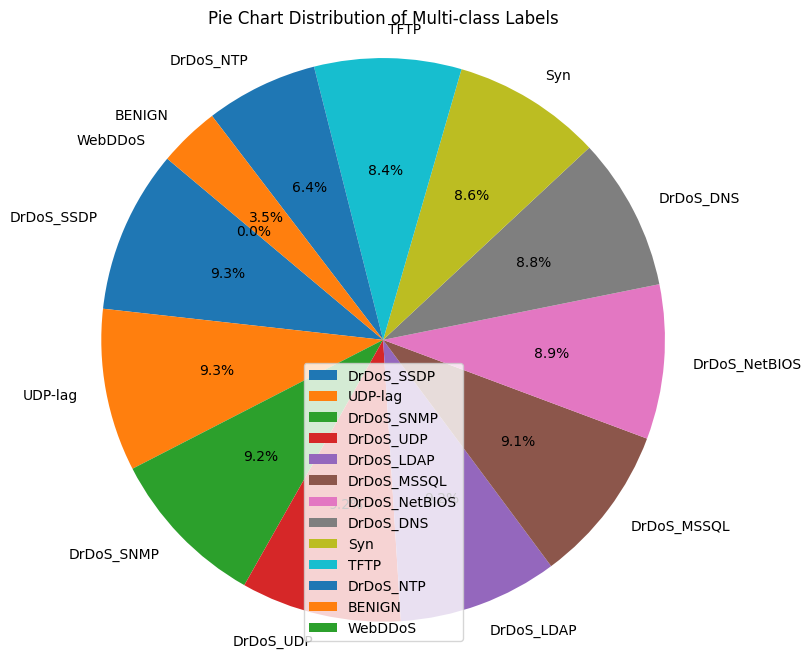

In [7]:
# Calculate value counts for the 'Label' column
label_counts = df[' Label'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart Distribution of Multi-class Labels')
plt.legend(loc='best')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.

# Save the pie chart to a file
plt.savefig('Pie_chart_multi.png')

plt.show()

In [8]:
# Changing labels into numbers

df[' Label'] = df[' Label'].replace('BENIGN', '0')
df[' Label'] = df[' Label'].replace('DrDoS_DNS', '1')
df[' Label'] = df[' Label'].replace('DrDoS_LDAP', '2')
df[' Label'] = df[' Label'].replace('DrDoS_MSSQL', '3')
df[' Label'] = df[' Label'].replace('DrDoS_NetBIOS', '4')
df[' Label'] = df[' Label'].replace('DrDoS_NTP', '5')
df[' Label'] = df[' Label'].replace('DrDoS_SNMP', '6')
df[' Label'] = df[' Label'].replace('DrDoS_SSDP', '7')
df[' Label'] = df[' Label'].replace('Syn', '8')
df[' Label'] = df[' Label'].replace('TFTP', '9')
df[' Label'] = df[' Label'].replace('DrDoS_UDP', '10')
df[' Label'] = df[' Label'].replace('UDP-lag', '11')
df[' Label'] = df[' Label'].replace('WebDDoS', '12')

df[' Label'] = df[' Label'].astype('int64')

In [9]:
import seaborn as sns
# corr_mat=dns.corr()
plt.figure(figsize=(100,200))
sns.heatmap(corr_matrix, annot=True, cmap = plt.cm.Reds)
plt.show()

NameError: name 'corr_matrix' is not defined

<Figure size 10000x20000 with 0 Axes>

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426331 entries, 0 to 426330
Data columns (total 75 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Flow ID                       426331 non-null  object 
 1    Source IP                    426331 non-null  object 
 2    Source Port                  426331 non-null  int64  
 3    Destination IP               426331 non-null  object 
 4    Destination Port             426331 non-null  int64  
 5    Protocol                     426331 non-null  int64  
 6    Timestamp                    426331 non-null  object 
 7    Flow Duration                426331 non-null  int64  
 8    Total Fwd Packets            426331 non-null  int64  
 9    Total Backward Packets       426331 non-null  int64  
 10  Total Length of Fwd Packets   426331 non-null  float64
 11   Total Length of Bwd Packets  426331 non-null  float64
 12   Fwd Packet Length Max        426331 non-nul

In [11]:
df.head(5)

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,172.16.0.5-192.168.50.1-634-60495-17,172.16.0.5,634,192.168.50.1,60495,17,51:39.8,28415,97,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1
1,172.16.0.5-192.168.50.1-60495-634-17,192.168.50.1,634,172.16.0.5,60495,17,51:39.8,2,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
2,172.16.0.5-192.168.50.1-634-46391-17,172.16.0.5,634,192.168.50.1,46391,17,51:39.9,48549,200,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1
3,172.16.0.5-192.168.50.1-634-11894-17,172.16.0.5,634,192.168.50.1,11894,17,51:39.9,48337,200,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1
4,172.16.0.5-192.168.50.1-634-27878-17,172.16.0.5,634,192.168.50.1,27878,17,51:39.9,32026,200,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1


In [12]:
from IPython.display import display
# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Assuming df is your DataFrame
# Create one-hot encoded columns
encoded_labels = pd.get_dummies(df[' Label'])

# Concatenate the one-hot encoded columns with the original DataFrame
df_encoded = pd.concat([df, encoded_labels], axis=1)

# Drop the original 'Label' column
df_encoded.drop([' Label'], axis=1, inplace=True)

# Display the resulting DataFrame nicely using display() function
display(df_encoded.head())

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,SYN Flag Count,RST Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,0,1,2,3,4,5,6,7,8,9,10,11,12
0,172.16.0.5-192.168.50.1-634-60495-17,172.16.0.5,634,192.168.50.1,60495,17,51:39.8,28415,97,0,42680.0,0.0,440.0,440.0,440.0,0.0,0.0,0.0,0.0,0.0,1.502024e+06,3413.689952,295.989583,500.959301,3596.0,1.0,28415.0,295.989583,500.959301,3596.0,1.0,0.0,0.0,0.0,0.0,0.0,0,-97.0,0,3413.689952,0.0,440.0,440.0,440.0,0.0,0.0,0,0,0,0,0,0.0,444.536083,440.0,0.0,-97.0,97,42680,0,0,-1,-1,96,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,False,True,False,False,False,False,False,False,False,False,False,False,False
1,172.16.0.5-192.168.50.1-60495-634-17,192.168.50.1,634,172.16.0.5,60495,17,51:39.8,2,2,0,880.0,0.0,440.0,440.0,440.0,0.0,0.0,0.0,0.0,0.0,4.400000e+08,1000000.000000,2.000000,0.000000,2.0,2.0,2.0,2.000000,0.000000,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0,-2.0,0,1000000.000000,0.0,440.0,440.0,440.0,0.0,0.0,0,0,0,0,0,0.0,660.000000,440.0,0.0,-2.0,2,880,0,0,-1,-1,1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,False,True,False,False,False,False,False,False,False,False,False,False,False
2,172.16.0.5-192.168.50.1-634-46391-17,172.16.0.5,634,192.168.50.1,46391,17,51:39.9,48549,200,0,88000.0,0.0,440.0,440.0,440.0,0.0,0.0,0.0,0.0,0.0,1.812602e+06,4119.549321,243.964824,578.101372,5418.0,1.0,48549.0,243.964824,578.101372,5418.0,1.0,0.0,0.0,0.0,0.0,0.0,0,-200.0,0,4119.549321,0.0,440.0,440.0,440.0,0.0,0.0,0,0,0,0,0,0.0,442.200000,440.0,0.0,-200.0,200,88000,0,0,-1,-1,199,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,False,True,False,False,False,False,False,False,False,False,False,False,False
3,172.16.0.5-192.168.50.1-634-11894-17,172.16.0.5,634,192.168.50.1,11894,17,51:39.9,48337,200,0,88000.0,0.0,440.0,440.0,440.0,0.0,0.0,0.0,0.0,0.0,1.820552e+06,4137.617146,242.899497,485.292695,3337.0,1.0,48337.0,242.899497,485.292695,3337.0,1.0,0.0,0.0,0.0,0.0,0.0,0,-200.0,0,4137.617146,0.0,440.0,440.0,440.0,0.0,0.0,0,0,0,0,0,0.0,442.200000,440.0,0.0,-200.0,200,88000,0,0,-1,-1,199,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,False,True,False,False,False,False,False,False,False,False,False,False,False
4,172.16.0.5-192.168.50.1-634-27878-17,172.16.0.5,634,192.168.50.1,27878,17,51:39.9,32026,200,0,88000.0,0.0,440.0,440.0,440.0,0.0,0.0,0.0,0.0,0.0,2.747767e+06,6244.925998,160.934673,196.891271,1236.0,0.0,32026.0,160.934673,196.891271,1236.0,0.0,0.0,0.0,0.0,0.0,0.0,0,-200.0,0,6244.925998,0.0,440.0,440.0,440.0,0.0,0.0,0,0,0,0,0,0.0,442.200000,440.0,0.0,-200.0,200,88000,0,0,-1,-1,199,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,False,True,False,False,False,False,False,False,False,False,False,False,False


In [13]:
# Save the cleaned DataFrame to a new CSV file
file_path = "C:\\Users\\user\\Documents\\jupyter\\Enhanced IDS\\Dataset\\df_visualized.csv"
df.to_csv(file_path, index=False)

print("DataFrame saved to:", file_path)

DataFrame saved to: C:\Users\user\Documents\jupyter\Enhanced IDS\Dataset\df_visualized.csv
